#  Price-Focused EDA – Airbnb Amsterdam

This notebook performs deep exploratory analysis specifically on the `price` variable.

###  Goals:
- Understand price distribution and outliers
- Identify appropriate bins and segment strategies
- Prepare the dataset for segmented modeling (e.g., Segment A and B)

 Output: Cleaned and labeled dataset with price segments ready for modeling


1. Load Data and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

2. Data Overview

In [2]:
df = pd.read_csv(r"C:\Users\parth\Desktop\Dhuwaraha\Big data\Data\listings_full.csv")
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6.624170e+06,https://www.airbnb.com/rooms/6624170,2.024090e+13,9/5/2024,previous scrape,"Warm, cozy sunlighted downtown appt",2 room appt. 1.8 km from central station with ...,NaN,https://a0.muscache.com/pictures/df91da10-f7d4...,34670170,...,4.86,4.56,4.65,0363 3CF3 3233 3B24 6BEC,f,1,1,0,0,0.38
1,8.837071e+06,https://www.airbnb.com/rooms/8837071,2.024090e+13,9/5/2024,previous scrape,Cozy apartment in city center,Located in Amsterdam's sweet spot. A stone's t...,see the guide,https://a0.muscache.com/pictures/5fee12d4-61d0...,13034277,...,NaN,NaN,NaN,0363 0C20 1768 FAAA 3556,f,1,1,0,0,NaN
2,7.161070e+05,https://www.airbnb.com/rooms/716107,2.024090e+13,9/5/2024,previous scrape,Loft style home nearby city centre,NaN,NaN,https://a0.muscache.com/pictures/9927048/b367a...,3689867,...,4.83,4.66,4.61,0363 0014 1E57 F097 81A5,f,1,1,0,0,1.21
3,6.645390e+17,https://www.airbnb.com/rooms/664538756986273255,2.024090e+13,9/6/2024,previous scrape,Geweldige duurzame eco woonark op unieke plek!,This unique eco houseboat is located in the mo...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7647768,...,5.00,5.00,5.00,0363 468D A0A1 6595 5E39,f,1,1,0,0,0.04
4,8.191077e+06,https://www.airbnb.com/rooms/8191077,2.024090e+13,9/5/2024,previous scrape,Old bar apartment,This just renovated apartment for 6 persons is...,Our apartment is situated in the centre of Ams...,https://a0.muscache.com/pictures/miso/Hosting-...,43205475,...,4.79,4.83,4.45,Exempt,f,1,0,1,0,2.41


3. Columns Selected for Analysis

In [3]:
pd.set_option('display.max_columns', None)
columns_to_keep = [
    'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'bedrooms',
    'accommodates', 'bathrooms_text', 'beds','amenities', 'host_is_superhost', 'host_identity_verified',
    'host_total_listings_count', 'availability_30', 'availability_60', 'availability_90', 'availability_365',
    'number_of_reviews', 'review_scores_rating','review_scores_accuracy',
    'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
    'review_scores_value', 'reviews_per_month', 'instant_bookable','minimum_nights', 'maximum_nights', 'price']
df_copy = df[columns_to_keep]
df_copy.head(4)

,neighbourhood_cleansed,latitude,longitude,property_type,room_type,bedrooms,accommodates,bathrooms_text,beds,amenities,host_is_superhost,host_identity_verified,host_total_listings_count,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,instant_bookable,minimum_nights,maximum_nights,price
0,Centrum-Oost,52.36842,4.92438,Entire rental unit,Entire home/apt,1.0,3,1 bath,NaN,"[""Dishes and silverware"", ""Smoke alarm"", ""Hang...",f,t,2,0,0,0,0,43,4.84,4.83,4.86,4.83,4.86,4.56,4.65,0.38,f,2,1125,NaN
1,De Baarsjes - Oud-West,52.36455,4.87712,Entire rental unit,Entire home/apt,1.0,2,1 bath,NaN,"[""Smoke alarm"", ""Essentials"", ""Iron"", ""Washer""...",f,f,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,2,1125,NaN
2,De Baarsjes - Oud-West,52.36462,4.86824,Entire rental unit,Entire home/apt,1.0,2,1 bath,NaN,"[""Smoke alarm"", ""Essentials"", ""Iron"", ""Host gr...",f,t,1,0,0,0,1,172,4.71,4.82,4.64,4.78,4.83,4.66,4.61,1.21,f,3,1125,NaN
3,Oud-Noord,52.39394,4.90587,Houseboat,Entire home/apt,2.0,3,1 bath,NaN,"[""Paid parking on premises"", ""Smoke alarm"", ""C...",f,t,4,0,0,0,0,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.04,f,3,21,NaN


In [4]:
df_copy.shape

(9659, 30)

4. Duplicate removals

In [5]:
df_copy[df_copy.duplicated()]

,neighbourhood_cleansed,latitude,longitude,property_type,room_type,bedrooms,accommodates,bathrooms_text,beds,amenities,host_is_superhost,host_identity_verified,host_total_listings_count,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,instant_bookable,minimum_nights,maximum_nights,price
369,De Pijp - Rivierenbuurt,52.353368,4.907164,Room in hotel,Private room,1.0,2,1 private bath,NaN,"[""Air conditioning"", ""Gym"", ""Smoke alarm"", ""Pa...",f,t,6,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,1,365,NaN
5352,De Pijp - Rivierenbuurt,52.353368,4.907164,Room in hotel,Private room,1.0,2,1 private bath,NaN,"[""Air conditioning"", ""Gym"", ""Smoke alarm"", ""Pa...",f,t,6,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,1,365,NaN
6280,De Pijp - Rivierenbuurt,52.353368,4.907164,Room in hotel,Private room,1.0,2,1 private bath,NaN,"[""Air conditioning"", ""Gym"", ""Smoke alarm"", ""Pa...",f,t,6,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,1,365,NaN
7407,De Pijp - Rivierenbuurt,52.353368,4.907164,Room in hotel,Private room,1.0,2,1 private bath,NaN,"[""Air conditioning"", ""Gym"", ""Smoke alarm"", ""Pa...",f,t,6,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,1,365,NaN


In [6]:
df_copy = df_copy.drop_duplicates(keep = "first")

In [7]:
df_copy = df_copy.dropna(subset=['price'])
print(f"Number of rows after dropping NaN values in 'price': {len(df_copy)}")

Number of rows after dropping NaN values in 'price': 5869


5.Cleaning Price Column

In [8]:
#$ sign and , replacing
df_copy['price'] = df_copy['price'].str.replace('$', '').str.replace(',', '') .str.strip().astype(float)
print(df_copy['price'].head())

10    269.0
31    254.0
32    203.0
33    375.0
34    599.0
Name: price, dtype: float64


6.Feature Type Identification

In [9]:
numeric_features = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'O']
categorical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype == 'O']

# print columns
print('We have {} numerical features'.format(len(numeric_features)))
print('\nWe have {} categorical features'.format(len(categorical_features)))

We have 22 numerical features

We have 8 categorical features


7. Price Value Distribution

In [10]:
price_counts = df_copy['price'].value_counts()

price_counts_df = price_counts.reset_index()
price_counts_df.columns = ['Price', 'Count']

price_counts_sorted = price_counts_df.sort_values(by='Price', ascending=False)

print(price_counts_sorted)

       Price  Count
497  91466.0      1
523  10000.0      1
466   7051.0      1
512   5000.0      1
441   3000.0      2
..       ...    ...
594     44.0      1
500     43.0      1
393     41.0      2
541     20.0      1
528     11.0      1

[618 rows x 2 columns]


8.Outlier Detection Using IQR

In [12]:
# Step 1: Calculate Q1, Q3 and IQR
Q1 = df_copy['price'].quantile(0.25)
Q3 = df_copy['price'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Find actual outliers
outliers = df_copy[(df_copy['price'] < lower_bound) | (df_copy['price'] > upper_bound)]

# Display the number and summary of outliers
print(f"Number of price outliers: {outliers.shape[0]}")
print(f"Outlier price range: Min = {outliers['price'].min()}, Max = {outliers['price'].max()}")

# Optional: View top 10 outliers
outliers.sort_values(by='price', ascending=False).head(10)


Number of price outliers: 318
Outlier price range: Min = 557.0, Max = 91466.0


,neighbourhood_cleansed,latitude,longitude,property_type,room_type,bedrooms,accommodates,bathrooms_text,beds,amenities,host_is_superhost,host_identity_verified,host_total_listings_count,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,instant_bookable,minimum_nights,maximum_nights,price
4534,De Pijp - Rivierenbuurt,52.356266,4.891267,Entire rental unit,Entire home/apt,1.0,2,1 bath,1.0,"[""Smoke alarm"", ""Iron"", ""Central heating"", ""Wa...",f,t,2,29,59,89,270,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,3,25,91466.0
2963,Centrum-West,52.379140,4.884910,Entire rental unit,Entire home/apt,1.0,2,1 bath,1.0,"[""Dishes and silverware"", ""Washer"", ""Hot tub"",...",f,t,1,30,60,90,365,24,4.71,4.71,4.63,5.00,4.92,5.00,4.50,0.19,f,5,1125,10000.0
7809,Oud-Noord,52.400967,4.894557,Entire rental unit,Entire home/apt,3.0,6,4 baths,3.0,"[""Dishes and silverware"", ""Paid parking on pre...",f,t,4,6,27,56,327,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,1,365,7051.0
4940,Centrum-West,52.381690,4.890230,Entire rental unit,Entire home/apt,1.0,3,1 bath,1.0,"[""Dishes and silverware"", ""Paid parking on pre...",t,t,1,0,8,22,34,315,4.89,4.87,4.90,4.98,4.97,4.95,4.76,3.95,t,2,730,5000.0
7903,Oud-Noord,52.399950,4.888400,Boat,Entire home/apt,7.0,16,2 baths,22.0,"[""Dishes and silverware"", ""Toaster"", ""Smoking ...",f,t,11,28,58,88,363,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,2,14,3000.0
9501,Oud-Noord,52.399930,4.891570,Boat,Entire home/apt,17.0,16,17 baths,30.0,"[""Smoke alarm"", ""Smoking allowed"", ""Outdoor di...",f,t,11,23,53,83,358,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,14,3000.0
3728,Centrum-West,52.368986,4.887528,Entire home,Entire home/apt,4.0,8,3.5 baths,4.0,"[""Dishes and silverware"", ""Bidet"", ""Private ba...",f,t,2,28,51,76,351,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.09,f,5,365,2685.0
5227,Centrum-West,52.370550,4.882480,Entire rental unit,Entire home/apt,2.0,4,1.5 baths,2.0,"[""Dishes and silverware"", ""Shower gel"", ""Coffe...",f,t,1,27,57,87,352,38,5.00,5.00,4.92,4.97,5.00,5.00,4.84,0.40,f,4,30,2500.0
966,De Aker - Nieuw Sloten,52.341016,4.818139,Entire home,Entire home/apt,12.0,16,7 baths,12.0,"[""Crib - available upon request"", ""Standalone ...",NaN,t,56,30,57,80,108,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,5,365,2250.0
4240,Centrum-West,52.372440,4.898270,Entire loft,Entire home/apt,3.0,4,2.5 baths,3.0,"[""Dishes and silverware"", ""Toaster"", ""Shower g...",f,t,2,16,16,16,16,4,5.00,5.00,4.50,5.00,5.00,5.00,4.75,0.36,f,2,4,2000.0


9.Visualizing Outliers vs Non-Outliers

In [16]:
df_copy['is_outlier'] = (df_copy['price'] < lower_bound) | (df_copy['price'] > upper_bound)

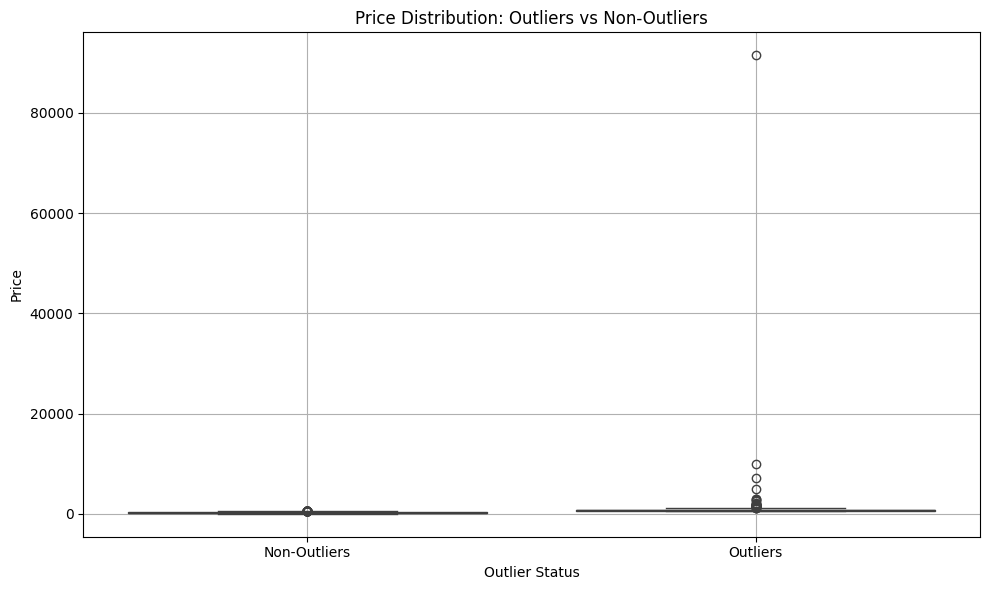

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_outlier', y='price', data=df_copy, showfliers=True)
plt.title("Price Distribution: Outliers vs Non-Outliers")
plt.xlabel("Outlier Status")
plt.ylabel("Price")
plt.xticks([0, 1], ['Non-Outliers', 'Outliers'])
plt.grid(True)
plt.tight_layout()
plt.show()


10.Get Ranges from cleaned data

In [19]:

non_outlier_min = df_copy[df_copy['price'] <= upper_bound]['price'].min()
non_outlier_max = df_copy[df_copy['price'] <= upper_bound]['price'].max()

outlier_min = df_copy[df_copy['price'] > upper_bound]['price'].min()
outlier_max = df_copy['price'].max()

print(f" Non-Outlier Price Range: {non_outlier_min} to {non_outlier_max}")
print(f" Outlier Price Range: {outlier_min} to {outlier_max}")



 Non-Outlier Price Range: 11.0 to 555.0
 Outlier Price Range: 557.0 to 91466.0


11.Outlier Price Range Binning

In [22]:
# Define outlier bins using cleaned df_copy
bins = [557, 700, 1000, 2000, df_copy['price'].max()]
labels = ['557–700', '700–1000', '1000–2000', '>2000']

# Filter outliers
outlier_df = df_copy[df_copy['price'] > 555].copy()

# Create binned ranges
outlier_df['outlier_bin'] = pd.cut(outlier_df['price'], bins=bins, labels=labels, include_lowest=True)

# Calculate % in each bin
bin_percentages = (outlier_df['outlier_bin'].value_counts(normalize=True) * 100).sort_index()

# Total outlier percentage
total_outlier_percentage = len(outlier_df) / len(df_copy) * 100

# Print results
print("Outlier Bin Breakdown:")
print(bin_percentages)
print(f"\nTotal Listings Above 555: {total_outlier_percentage:.2f}%")



Outlier Bin Breakdown:
outlier_bin
557–700      50.943396
700–1000     32.704403
1000–2000    13.522013
>2000         2.830189
Name: proportion, dtype: float64

Total Listings Above 555: 5.42%


In [41]:
# Define bins and labels using cleaned price data
bins = [0, 100, 200, 300, 400, 500, 555, 700, 1000, 2000, df_copy['price'].max()]
labels = ['<100', '100–200', '200–300', '300–400', '400–500', '500–555',
          '557–700', '700–1000', '1000–2000', '>2000']

# Optional: remove listings with price == 556 to avoid bin overlap
df_filtered = df_copy[df_copy['price'] != 556]

# Bin prices
df_filtered['price_bin'] = pd.cut(df_filtered['price'], bins=bins, labels=labels, include_lowest=True)

# Get % distribution per bin
price_bin_percentages = (df_filtered['price_bin'].value_counts(normalize=True) * 100).sort_index()

# Display result
print(" Full Dataset Price Distribution (%):")
print(price_bin_percentages)


 Full Dataset Price Distribution (%):
price_bin
<100          6.985858
100–200      35.031522
200–300      30.635543
300–400      14.210257
400–500       6.372465
500–555       1.346056
557–700       2.760266
700–1000      1.772022
1000–2000     0.732663
>2000         0.153348
Name: proportion, dtype: float64


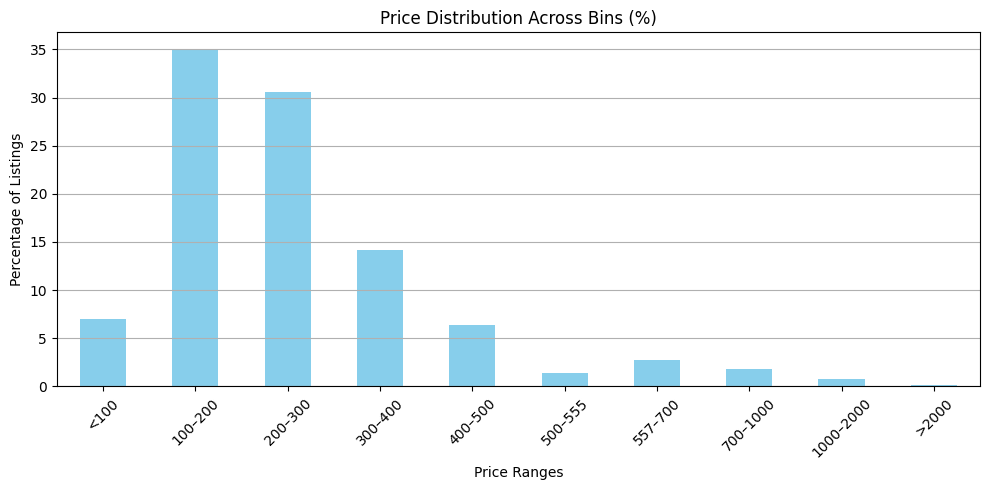

In [25]:
import matplotlib.pyplot as plt

price_bin_percentages.plot(kind='bar', color='skyblue', figsize=(10, 5))
plt.title("Price Distribution Across Bins (%)")
plt.xlabel("Price Ranges")
plt.ylabel("Percentage of Listings")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


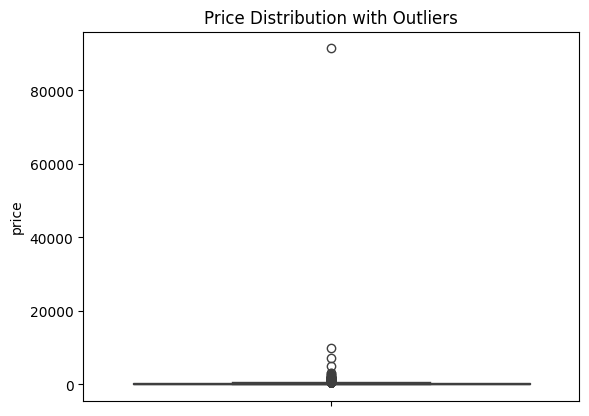

52


In [26]:
# Visualize target variable
sns.boxplot(df_copy['price'])
plt.title("Price Distribution with Outliers")
plt.show()

# Let's see how many listings are above 1000
print(df_copy[df_copy['price'] > 1000].shape[0])

# Option: Filter to remove outliers from training set (optional threshold)
df_filtered = df_copy[df_copy['price'] < 1000]

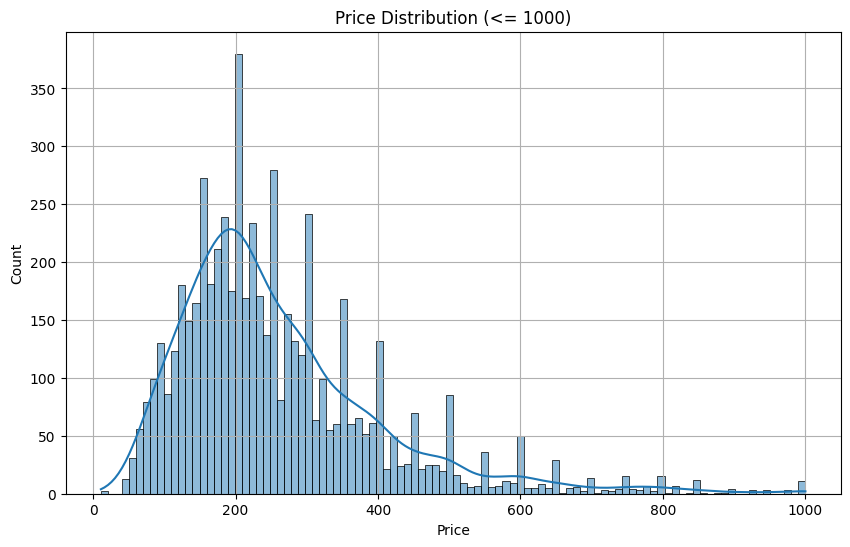

In [29]:
# Focused view on prices below 1000
plt.figure(figsize=(10,6))
sns.histplot(df_copy[df_copy['price'] <= 1000]['price'], bins=100, kde=True)
plt.title("Price Distribution (<= 1000)")
plt.xlabel("Price")
plt.ylabel("Count")
plt.grid(True)
plt.show()


In [36]:
# Filter listings under $1000 using cleaned df_copy
low_price_df = df_copy[df_copy['price'] <= 1000].copy()

# Calculate IQR bounds
Q1 = low_price_df['price'].quantile(0.25)
Q3 = low_price_df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f" Normal price range (<=1000): {lower_bound:.2f} to {upper_bound:.2f}")

# Flag local outliers within this segment
low_price_df['is_outlier'] = (low_price_df['price'] < lower_bound) | (low_price_df['price'] > upper_bound)

# Count of local outliers
print(" Outliers below $1000:", low_price_df['is_outlier'].sum())



 Normal price range (<=1000): -75.00 to 557.00
 Outliers below $1000: 264


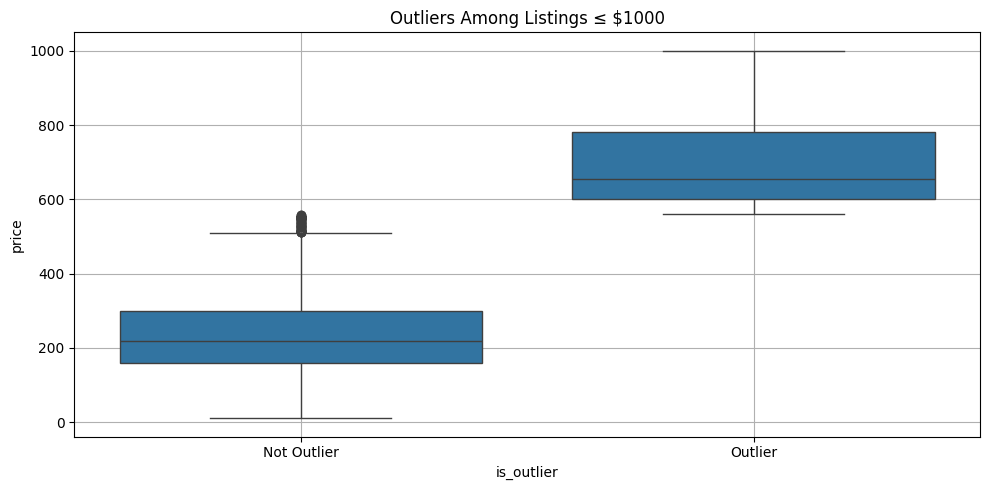

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(x='is_outlier', y='price', data=low_price_df)
plt.xticks([0, 1], ['Not Outlier', 'Outlier'])
plt.title("Outliers Among Listings ≤ $1000")
plt.grid(True)
plt.tight_layout()
plt.show()


###  Final Note: Why $1000 Was Selected as the Price Threshold

Based on the price distribution analysis:

- Over **95%** of listings fall **below 1000**, as shown in the full dataset bin analysis.
- Listings priced above $1000 are **very rare (<5%)**, as confirmed by:
  - The **outlier breakdown** using IQR (Section 6–7)
  - The **bin distribution** and **histogram** (Section 8–9)
- Listings above 1000 show **high variability and extreme outliers** (e.g., listings priced over 90,000), which can distort model learning and lead to poor generalization.
- Segmenting data at 1000 ensures:
  -  A more **stable and representative dataset** for training the model (Segment A)
  -  High-priced listings (Segment B) can be analyzed separately with tailored approaches

 Therefore, 1000 was selected as a **cutoff point** to divide the dataset into Segment A (≤ 1000) and Segment B (> 1000) for focused modeling and improved prediction accuracy._
